## Capstone Project : Horror Movie Image Classification

Image Classification with Convolutional Neural Networks<br>
https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

Building powerful image classification models using very little data<br>
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Simple Image Classification using Convolutional Neural Network — Deep Learning in python.<br>
https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

Dataset:<br>
Monsters: 412 images<br>
People: 378 images

Alternate Idea:<br>
Kaggle Horror Movie Dataset<br>
https://www.kaggle.com/PromptCloudHQ/imdb-horror-movie-dataset

In [22]:
from PIL import Image
import h5py

from PIL import Image, ImageFilter
try:
    original = Image.open('data/train/monsters/m1.jpg')
except:
    print("Unable to load image")

In [23]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [25]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolders of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train/',  # this is the target directory
        target_size=(300, 300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/test/',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')


Found 600 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [26]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
# TRAINING
model.fit_generator(
        train_generator,
        steps_per_epoch=600 // batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=150 // batch_size)

model.save_weights('dropout08.h5')  # always save your weights after training or during training

Epoch 1/30
37/37 [==============================] - 185s 5s/step - loss: 0.7182 - acc: 0.5135 - val_loss: 0.6899 - val_acc: 0.5903
Epoch 2/30
37/37 [==============================] - 155s 4s/step - loss: 0.6916 - acc: 0.5287 - val_loss: 0.6865 - val_acc: 0.4925
Epoch 3/30
37/37 [==============================] - 160s 4s/step - loss: 0.6957 - acc: 0.4966 - val_loss: 0.6918 - val_acc: 0.5970
Epoch 4/30
37/37 [==============================] - 157s 4s/step - loss: 0.6921 - acc: 0.5033 - val_loss: 0.7048 - val_acc: 0.4552
Epoch 5/30
37/37 [==============================] - 158s 4s/step - loss: 0.6983 - acc: 0.5440 - val_loss: 0.6869 - val_acc: 0.6045
Epoch 6/30
37/37 [==============================] - 170s 5s/step - loss: 0.6895 - acc: 0.5725 - val_loss: 0.6480 - val_acc: 0.6493
Epoch 7/30
37/37 [==============================] - 178s 5s/step - loss: 0.6797 - acc: 0.5541 - val_loss: 0.8029 - val_acc: 0.5597
Epoch 8/30
37/37 [==============================] - 167s 5s/step - loss: 0.6929 - a

In [28]:
model.evaluate_generator(validation_generator)

[0.7600539882977804, 0.5666666666666667]

In [60]:
preds_test = model.predict_generator(validation_generator)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [64]:
preds_test = [1 if x > .5 else 0 for x in preds_test]

In [65]:
print(classification_report(validation_generator.classes,preds_test))

             precision    recall  f1-score   support

          0       0.47      0.59      0.52        75
          1       0.45      0.33      0.38        75

avg / total       0.46      0.46      0.45       150



In [66]:
accuracy_score(validation_generator.classes,preds_test)

0.46

In [77]:
import matplotlib.pyplot as plt

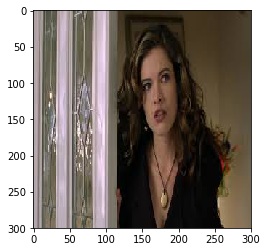

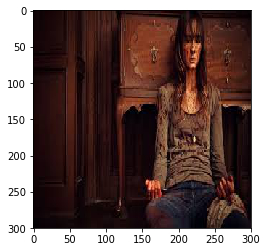

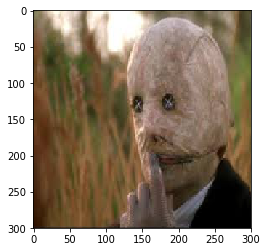

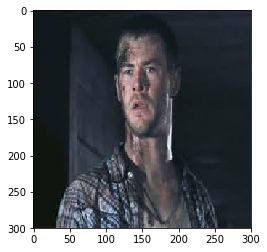

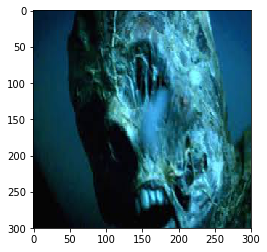

In [101]:
my_img = next(validation_generator)[0]
pred_dict = {}
for img in range(5):
    plt.figure()
    plt.imshow(my_img[img])
    preds = model.predict(my_img)
    pred_dict[img] = [0 if i <.5 else 1 for i in preds]
    print('\n')

In [102]:
pred_dict

{0: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 1: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 2: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 3: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 4: [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]}